## **1) 🔎 Análisis Exploratorio de Datos**
*by Uriel Emiliano Mendez*


Este proyecto consiste en la predicción de la supervivencia de los pasajeros del Titanic utilizando técnicas de Machine Learning. Utilizando el conjunto de datos disponible en Kaggle, he aplicado diversas estrategias de análisis, limpieza de datos y modelos de clasificación para predecir quién sobrevivió al naufragio.

In [1]:
import pandas as pd
import re

In [2]:
# Visual Studio Code
df_main = pd.read_csv('../datasets/titanic-train.csv')
df_ext = pd.read_csv('../datasets/titanic-train-extended.csv')

# Google colab
# from google.colab import drive
# drive.mount('/content/drive')
# df_main = pd.read_csv('/content/drive/MyDrive/IES/2º Semestre/Aprendizaje Automatico I/Notebooks/Titanic/Titanic-Dataset.csv')
# df_ext = pd.read_csv('/content/drive/MyDrive/IES/2º Semestre/Aprendizaje Automatico I/Notebooks/Titanic/Titanic-Dataset-Extendido.csv')

print(df_main.shape, df_ext.shape)

(891, 12) (891, 21)


### Pruebas empiricas 🗂️

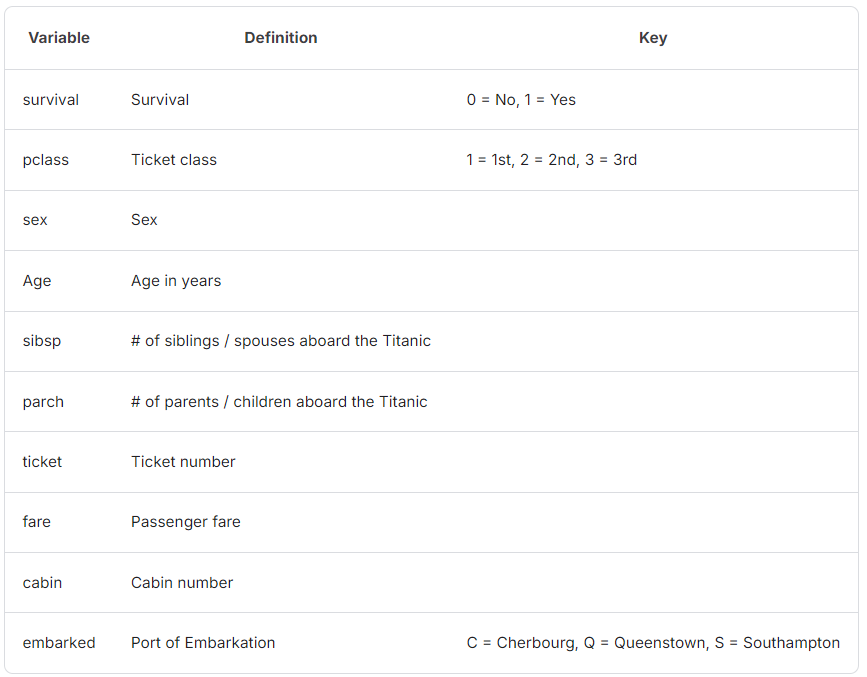

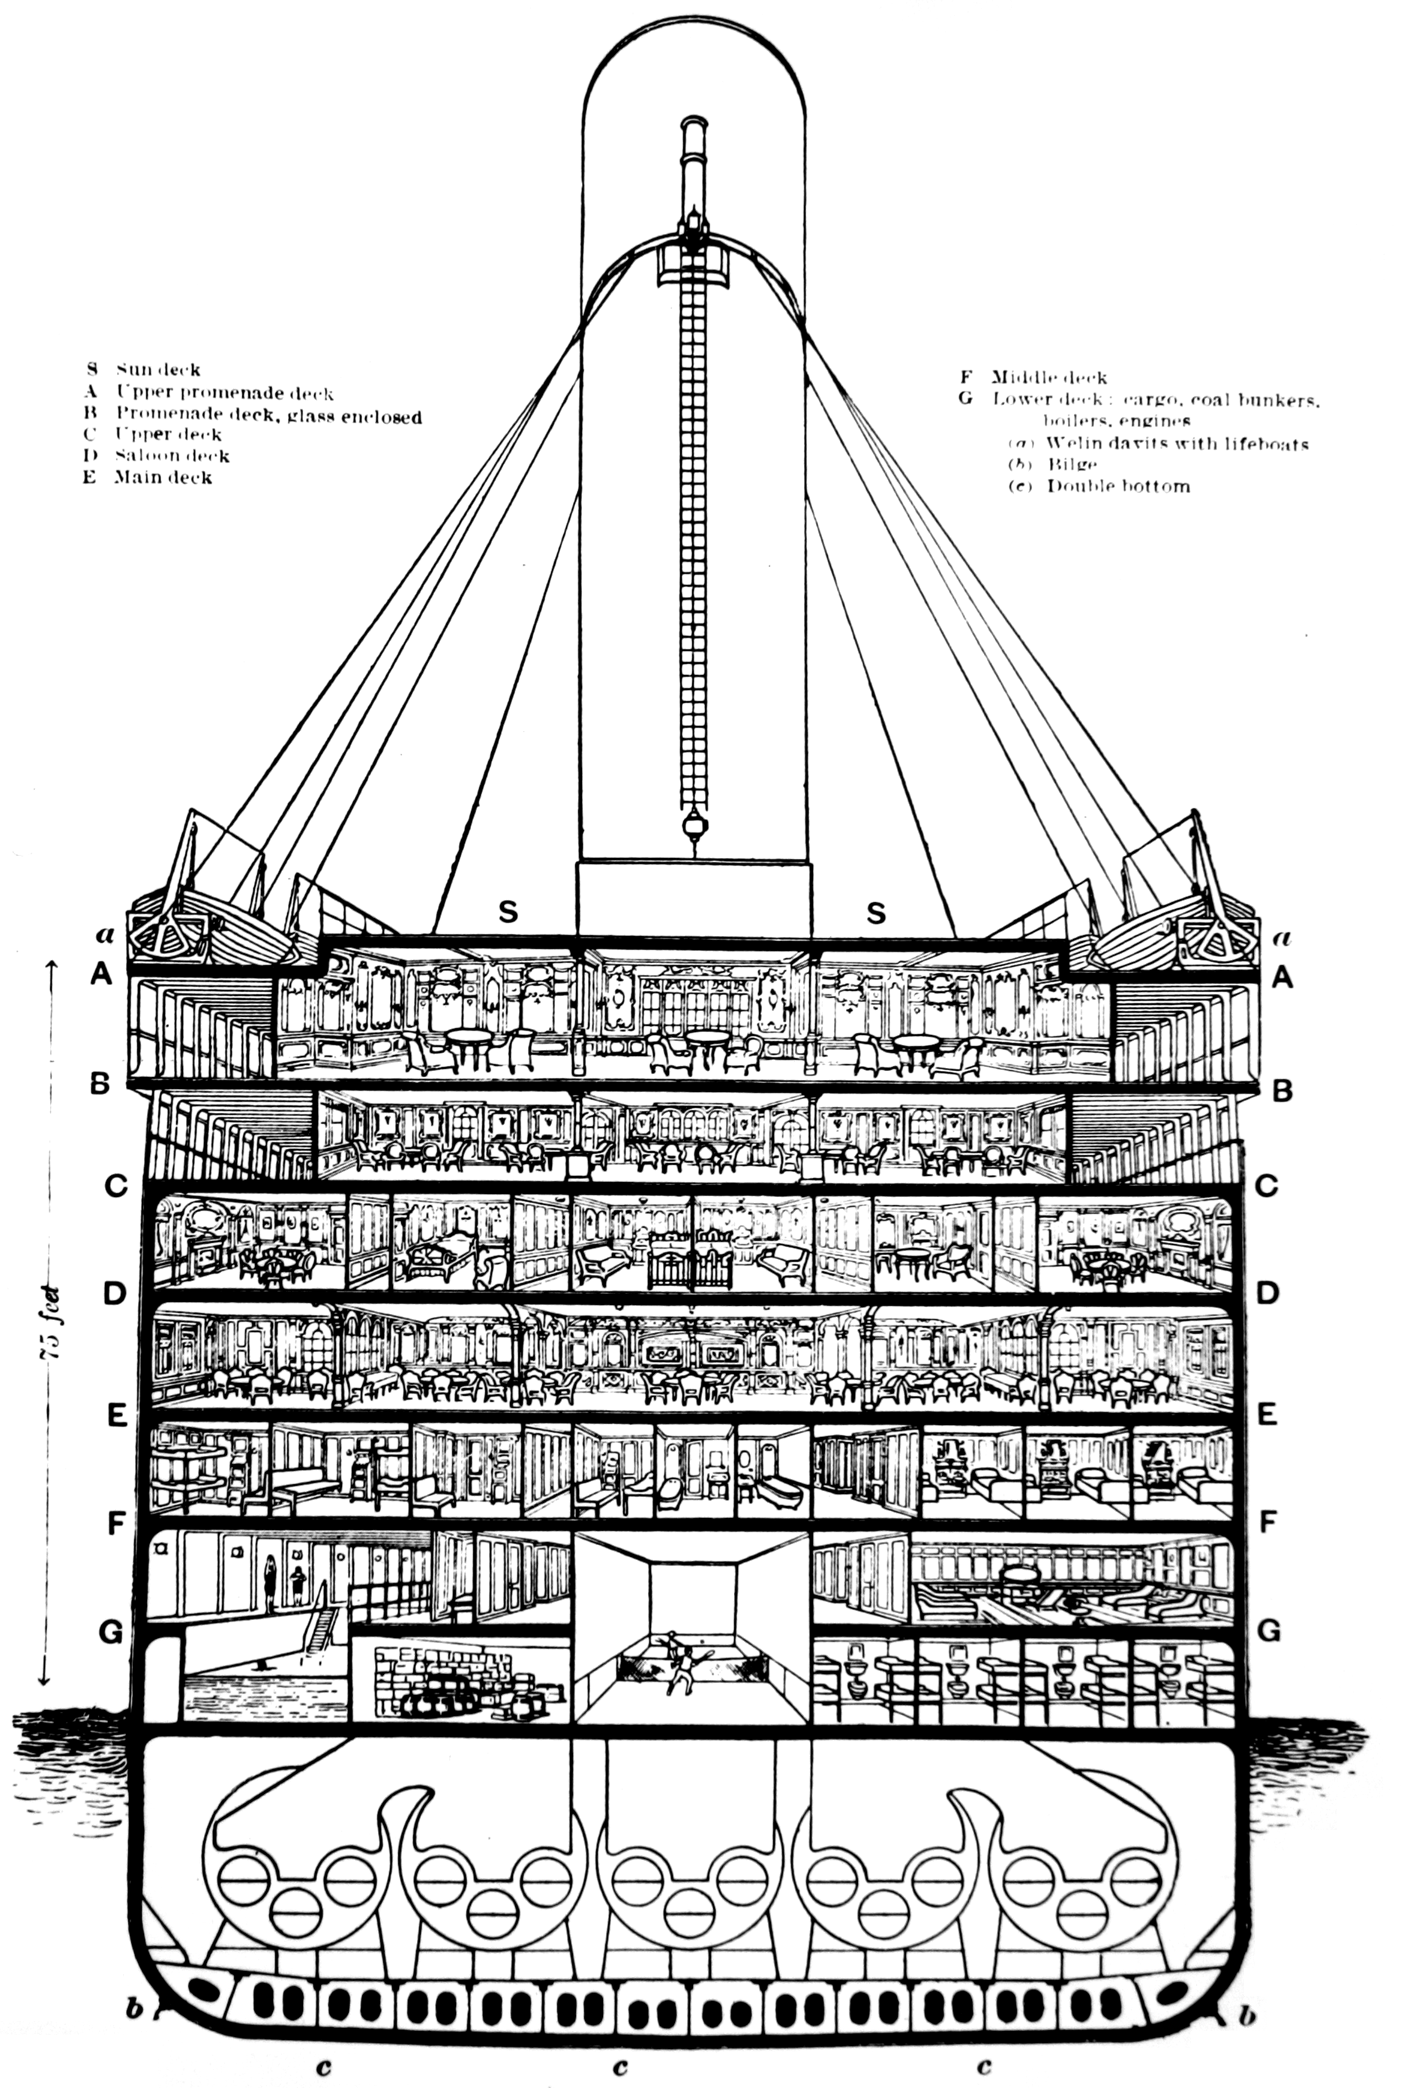

### Análisis preliminar 🕵️

Como primer paso, voy a ver si existen registros duplicados en el dataset. En caso de haber, los elimino.

In [10]:
df = df_main.copy()
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C


In [11]:
print('Cantidad de duplicados en el dataset:',df.duplicated().sum())
df.drop_duplicates(inplace = True)

Cantidad de duplicados en el dataset: 0


Elimino las columnas que no son de utilidad para el análisis, como lo son las columnas `Ticket`, `PassengerId` y `Cabin` (que tiene mas del 70% de los valores nulos).

In [12]:
# Muestro que procentaje de faltantes tiene cada columna
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Aunque la columna `Cabin` me podria ser de gran ayuda, decido eliminarla por su gran cantidad de datos faltantes. Podria hacer un *web scraping* para conseguir los datos faltantes, pero creo que lleva su debido tiempo y no vale la pena.

In [13]:
df.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [14]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


### Graficos 📊

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Grafico para mostrar en porcentaje y cantidad, las personas que sobrevivieron y las que no, agrupado por sexo.

<Figure size 300x300 with 0 Axes>

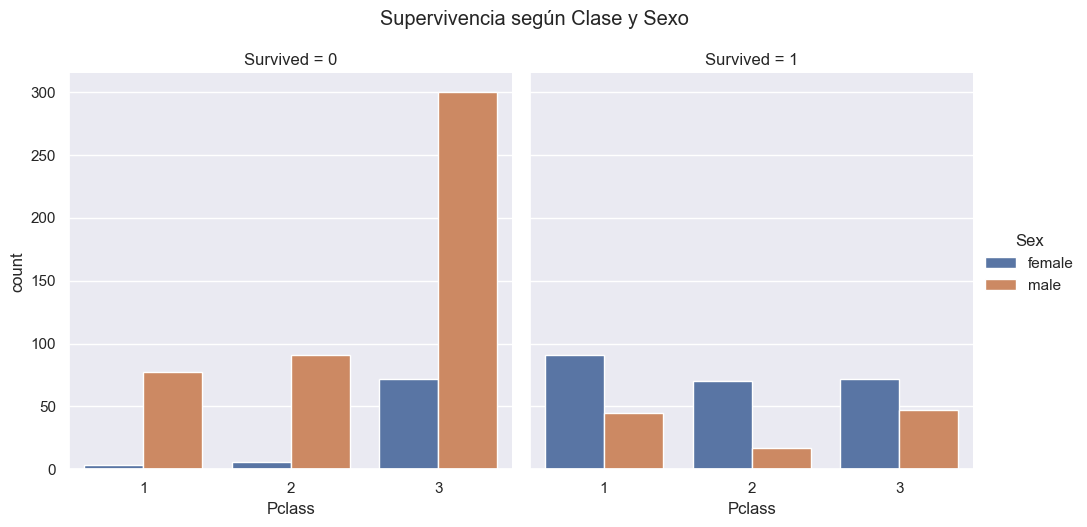

In [35]:
plt.figure(figsize=(3, 3))
sns.catplot(data=df, x='Pclass', hue='Sex', col='Survived', kind='count')
plt.suptitle('Supervivencia según Clase y Sexo', y=1.05)
plt.show()

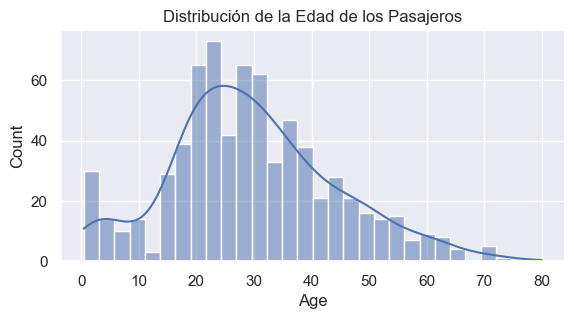

In [36]:
plt.figure(figsize=(6.5, 3))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Edad de los Pasajeros')
plt.show()

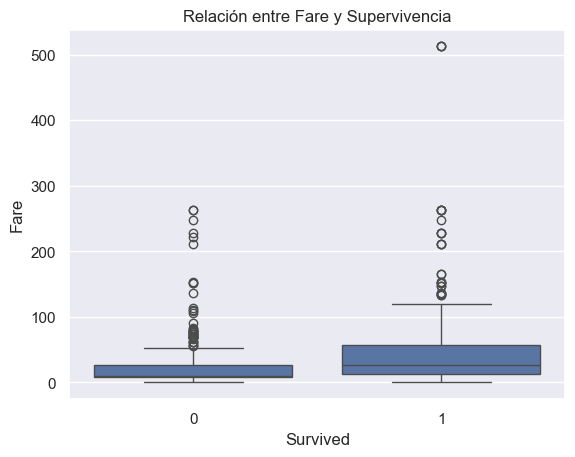

In [37]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Relación entre Fare y Supervivencia')
plt.show()

En este punto, me interesa crear una columna que unifique la cantidad de familiares que tiene un pasajero, ya sea esposo/a, hijos/as o simplemente familiares. Para esto, creo la columna `FamilySize` y elimino las columna de `SibSp` y `Parch`.

In [16]:
df.loc[:, 'FamilySize'] = df.SibSp + df.Parch
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

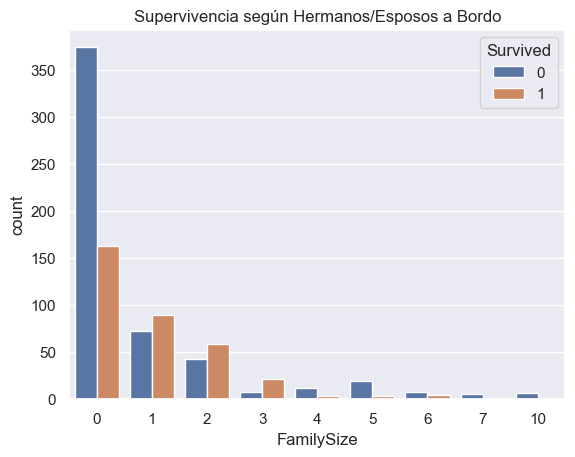

In [17]:
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Supervivencia según Hermanos/Esposos a Bordo')
plt.show()

---
### **Feature Engenieering** (Ingenieria de variables) ⚙️

Ahora necesito convertir a valores numericos las columnas que son caracteres "strings", por lo tanto utilizo la funcion de pandas `get_dummies`, que es similiar a hacer un `OneHotEncoder`.

In [18]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])
df.sample(3)

,PassengerId,Survived,Name,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
847,848,0,"Markoff, Mr. Marin",35.0,7.8958,0,False,True,False,False,True,True,False,False
378,379,0,"Betros, Mr. Tannous",20.0,4.0125,0,False,True,False,False,True,True,False,False
11,12,1,"Bonnell, Miss. Elizabeth",58.0,26.5500,0,True,False,True,False,False,False,False,True


Ahora, para aprovechar la información que contiene la columna `Name`, lo que me interesa saber es que pronombre o titulo lleva cada pasajero. Con eso puedo saber no solo el rango etario de la persona, sino tambien su clase social por ejemplo.

Empiezo por averiguar cual es la mediana de la columna `Age` *(edad)* de los titulos mas representativos en el dataset.

C:\Users\uriel\AppData\Local\Temp\ipykernel_23972\2424522886.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ages, labels=titles, patch_artist=True)


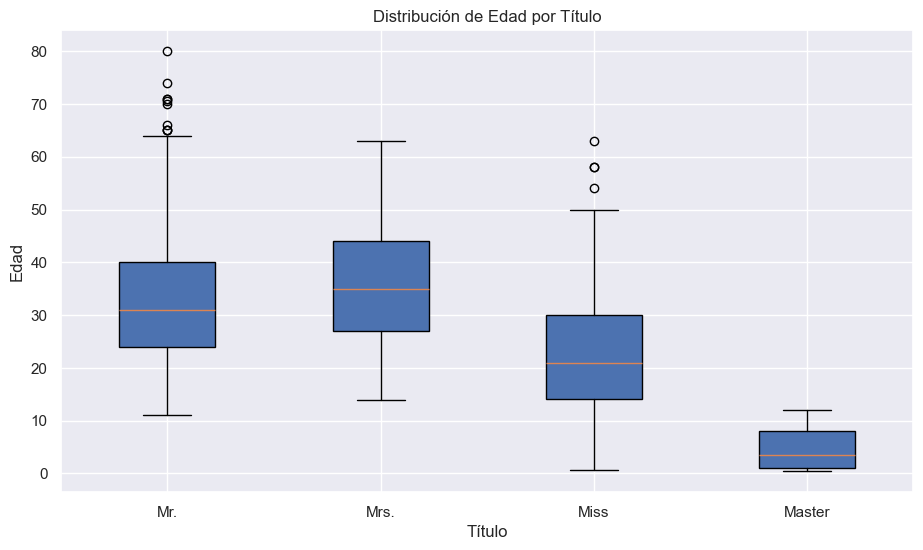

In [19]:
mr_age = df.loc[df.Name.str.contains('Mr.')].Age.dropna()
mrs_age = df.loc[df.Name.str.contains('Mrs.')].Age.dropna()
miss_age = df.loc[df.Name.str.contains('Miss')].Age.dropna()
master_age = df.loc[df.Name.str.contains('Master')].Age.dropna()

ages = [mr_age, mrs_age, miss_age, master_age]

# Títulos correspondientes
titles = ['Mr.', 'Mrs.', 'Miss', 'Master']

fig, ax = plt.subplots(figsize=(11, 6))
ax.boxplot(ages, labels=titles, patch_artist=True)
ax.set_title('Distribución de Edad por Título')
ax.set_xlabel('Título')
ax.set_ylabel('Edad')

plt.show()

Extraigo el titulo de cada pasajero, creando la columna `Title` para guardar estos resultados.

In [20]:
df.loc[:, 'Title'] = df.Name.str.extract(r' ([A-Za-z]+)\.')
df[['Name', 'Title']].sample(5)

,Name,Title
443,"Reynaldo, Ms. Encarnacion",Ms
344,"Fox, Mr. Stanley Hubert",Mr
563,"Simmons, Mr. John",Mr
159,"Sage, Master. Thomas Henry",Master
771,"Jensen, Mr. Niels Peder",Mr


En el codigo a continuación, lo que busco hacer es, ver de cada titulo en el nombre, cuantos sobrevivieron y cuantos no pudieron.

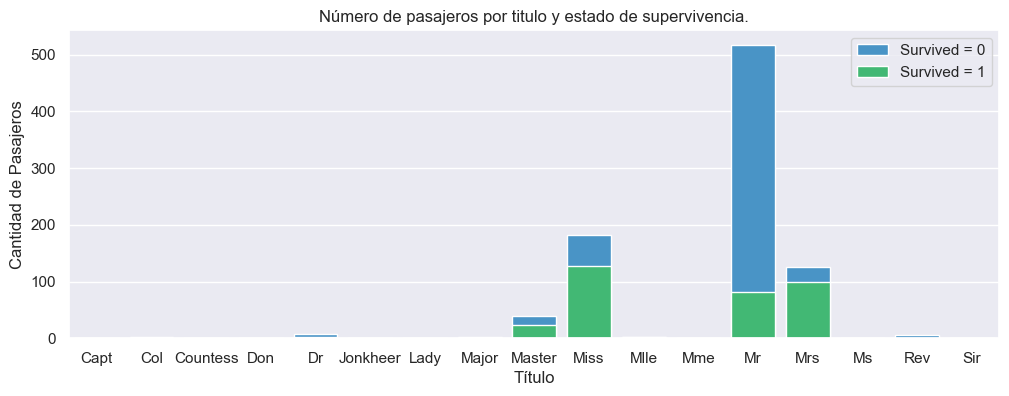

In [21]:
test = df.copy()
test['Died'] = test.Survived.apply(lambda x: 1 if x == 0 else 0)

survived_by_title = test[['Title', 'Survived', 'Died']].groupby('Title').sum().reset_index()

survived_by_title['Total'] = survived_by_title.Survived + survived_by_title.Died

plt.figure(figsize=(12, 4))
sns.barplot(x='Title', y='Total', data=survived_by_title, color='#3498db', label='Survived = 0')
sns.barplot(x='Title', y='Survived', data=survived_by_title, color='#2ecc71', label='Survived = 1')
plt.title('Número de pasajeros por titulo y estado de supervivencia.')
plt.xlabel('Título')
plt.ylabel('Cantidad de Pasajeros')

plt.legend()
plt.show()

Finalmente, necesito tener todos mis datos en valores numericos, entonces empiezo a eliminar las columnas con valores con letras.

In [22]:
df_num = df.drop(['Name'], axis = 1)
df_num.isna().sum()

PassengerId      0
Survived         0
Age            177
Fare             0
FamilySize       0
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title            0
dtype: int64

Aprovechando la columna de `Age_wiki` del dataset extendido, quiero asignar a los pasajeros que tienen la edad como valor vacio, los valores de las edades sacadas de wikipedia. Para eso, hago un *merge* entre ambos dataframes y asi conecto las columnas.

In [45]:
# A los registros que tienen nulos en la columna Age, le asigno el valor de Age_wiki
df_num = df_num.merge(df_ext[['PassengerId', 'Age_wiki']], how = 'outer', on = 'PassengerId')
df_num.Age = df_num.Age.fillna(df_num.Age_wiki)
df_num.isna().sum()

PassengerId    0
Survived       0
Age            4
Fare           0
FamilySize     0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Title          0
Age_wiki       4
dtype: int64

Como noto que quedan cuatro registros con los valores de edad como nulos, decido imputarle los valores de la mediana de la columna `Age`

In [46]:
df_num.loc[df_num.Age.isna()]

,PassengerId,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title,Age_wiki
42,43,0,NaN,7.8958,0,False,True,False,False,True,True,False,False,Mr,NaN
347,348,1,NaN,16.1000,1,True,False,False,False,True,False,False,True,Mrs,NaN
420,421,0,NaN,7.8958,0,False,True,False,False,True,True,False,False,Mr,NaN
557,558,0,NaN,227.5250,0,False,True,True,False,False,True,False,False,Mr,NaN


In [47]:
indexes = df_num.loc[df_num.Age.isna()].index
df_num.loc[indexes, 'Age'] = df_num.Age.median()

In [48]:
df_num.loc[df_num.Age.isna()]

,PassengerId,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title,Age_wiki


Finalmente, convierto todos los valores a flotantes, y con esto, ya puedo hacer una matriz de correlación para explorar las relaciones que existen entre las columns del datasets.

In [49]:
titulos_frecuentes = df_num.Title.value_counts().reset_index().Title[:4].values

df_num_cortado = pd.get_dummies(df_num[df_num['Title'].isin(titulos_frecuentes)], ['Title'])
df_num_cortado.head()

,PassengerId,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Age_wiki,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,22.0,7.2500,1,False,True,False,False,True,False,False,True,22.0,False,False,True,False
1,2,1,38.0,71.2833,1,True,False,True,False,False,True,False,False,35.0,False,False,False,True
2,3,1,26.0,7.9250,0,True,False,False,False,True,False,False,True,26.0,False,True,False,False
3,4,1,35.0,53.1000,1,True,False,True,False,False,False,False,True,35.0,False,False,False,True
4,5,0,35.0,8.0500,0,False,True,False,False,True,False,False,True,35.0,False,False,True,False


In [50]:
df_num = pd.merge(df_num, df_num_cortado)

df_num = df_num.drop(['Age_wiki', 'Title', 'PassengerId'], axis = 1).astype(float)
df_num.head()

,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,22.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,38.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,26.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,35.0,53.1000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


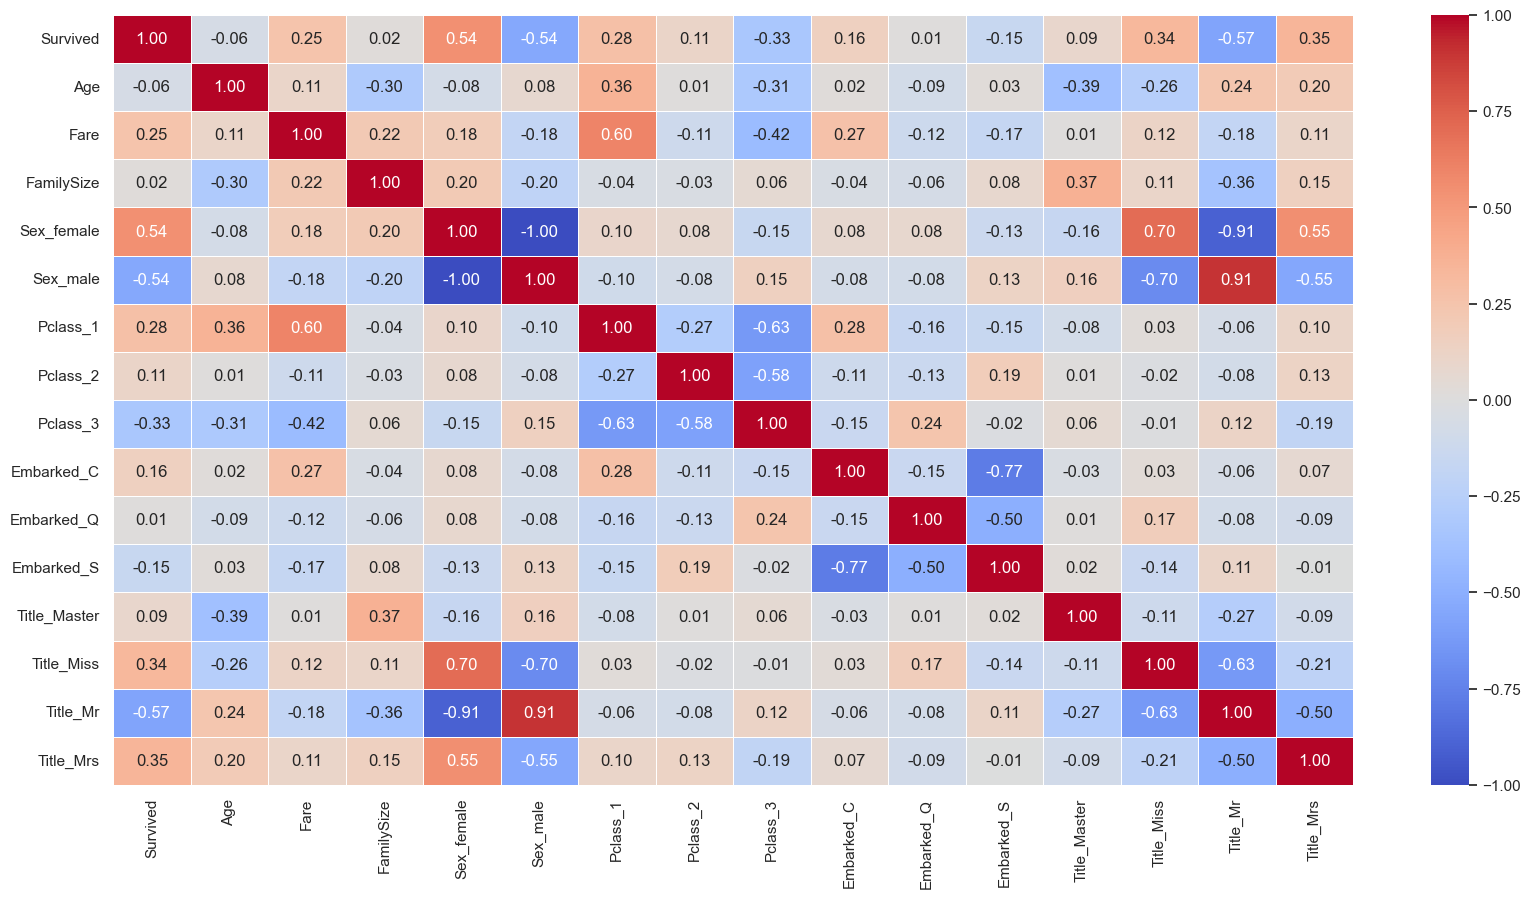

In [51]:
correlacion = df_num[df_num.describe().columns].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [52]:
# Exporto el dataset obtenido para poder empezar a entrenar los modelos de sklearn.
df_num.to_csv('../datasets/train-limpio.csv', index = False)

In [27]:
from sklearn.feature_selection import mutual_info_classif

x, y = df_num.drop('Survived', axis = 1), df_num.Survived
mutual = pd.DataFrame(data = mutual_info_classif(x, y), index = x.columns, columns = ['value']).reset_index()

In [29]:
mutual.sort_values('value', ascending = False)

,index,value
13,Title_Mr,0.186517
1,Fare,0.148511
3,Sex_female,0.141734
4,Sex_male,0.132035
14,Title_Mrs,0.096053
12,Title_Miss,0.064475
2,FamilySize,0.049346
7,Pclass_3,0.042001
5,Pclass_1,0.039850
10,Embarked_S,0.030372


### **Data en internet**

Cabinas por pasajero: https://www.encyclopedia-titanica.org/cabins.html

Pasajeros por clase: https://titanicfacts.net/titanic-passenger-list/